In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Utk_tourist=pd.read_csv("export1.csv")

In [3]:
Utk_tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
place         172 non-null object
Adventure     172 non-null int64
Recreation    172 non-null int64
Beauty        172 non-null int64
Pilgrim       172 non-null int64
History       172 non-null int64
Trekcamp      172 non-null int64
Foodcamp      172 non-null int64
dtypes: int64(7), object(1)
memory usage: 10.8+ KB


In [4]:
Utk_tourist.describe()

,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Foodcamp
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,54.011628,45.796512,71.313953,66.412791,66.261628,47.040698,55.081395
std,26.394220,31.142746,20.946192,26.847380,25.552060,33.738131,31.611019
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.750000,18.750000,60.000000,60.000000,50.000000,10.000000,30.750000
50%,58.500000,47.500000,75.000000,75.000000,75.000000,49.500000,60.000000
75%,73.500000,70.250000,85.000000,85.000000,85.000000,78.250000,84.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
X=Utk_tourist.iloc[:,[1, 2, 3, 4, 5, 6, 7]].values

In [6]:
X

array([[ 50,  70,  80, ...,  50,   0,  85],
       [ 90, 100,  60, ...,  90,  50, 100],
       [ 95,  90,  65, ...,  91,  49, 100],
       ...,
       [ 65,  20,  89, ...,  55,  94,   0],
       [ 60,  74,  75, ...,   9,   0,  80],
       [ 75,  20,  80, ...,  45,  91,   0]], dtype=int64)

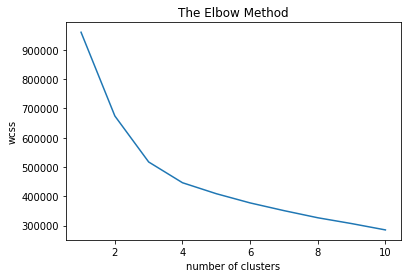

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


In [8]:
kmeans=KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [9]:
y_kmeans

array([3, 0, 0, 0, 3, 0, 0, 1, 3, 1, 2, 2, 3, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 3, 0, 2,
       0, 2, 0, 1, 3, 2, 3, 2, 1, 1, 0, 1, 1, 2, 3, 3, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 1, 0, 0, 3,
       2, 3, 3, 3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 3, 3, 2, 3, 2, 0, 0, 3,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 3, 2])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X.data)
pca_2d = pca.transform(X.data)

In [11]:
pca_2d

array([[ 6.30219729e+01,  1.49986054e+01],
       [ 6.35034609e+01,  5.15447059e+01],
       [ 4.73425102e+01,  2.89025786e+01],
       [ 4.37383563e+01,  6.92565503e+00],
       [ 5.02481349e+00,  1.00284693e+02],
       [ 1.00268465e+02, -1.61433063e+01],
       [ 8.58103162e+01, -4.03585023e+01],
       [ 2.64053156e+01, -1.69386074e+01],
       [ 1.63088194e+01,  1.59062780e+01],
       [-3.30751516e+01, -4.90385134e+01],
       [-5.37096701e+01, -2.88192568e+01],
       [-7.46056353e+01, -1.96079636e+01],
       [-2.50612159e+01,  3.92679962e+01],
       [ 3.77952142e+01,  8.99146789e+00],
       [ 7.50832592e+01,  3.92647472e+00],
       [-8.80033585e+01,  1.65214882e+01],
       [-6.37070136e+01, -3.71684160e+01],
       [-7.86031169e+01,  6.57062845e+00],
       [-2.24413075e+01, -3.03570304e+01],
       [-5.87357359e+01, -1.32743917e+01],
       [-6.82390420e+01, -8.58405392e+00],
       [-8.89057140e+01, -4.43267891e+00],
       [ 2.74013907e+00, -1.05700217e+01],
       [-7.

In [12]:
X

array([[ 50,  70,  80, ...,  50,   0,  85],
       [ 90, 100,  60, ...,  90,  50, 100],
       [ 95,  90,  65, ...,  91,  49, 100],
       ...,
       [ 65,  20,  89, ...,  55,  94,   0],
       [ 60,  74,  75, ...,   9,   0,  80],
       [ 75,  20,  80, ...,  45,  91,   0]], dtype=int64)

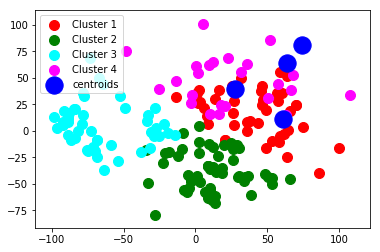

In [13]:
plt.scatter(pca_2d[y_kmeans==0, 0], pca_2d[y_kmeans==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(pca_2d[y_kmeans==1, 0], pca_2d[y_kmeans==1, 1], s=100, c="green", label="Cluster 2")
plt.scatter(pca_2d[y_kmeans==2, 0], pca_2d[y_kmeans==2, 1], s=100, c="cyan", label="Cluster 3")
plt.scatter(pca_2d[y_kmeans==3, 0], pca_2d[y_kmeans==3, 1], s=100, c="magenta", label="Cluster 4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="blue", label="centroids")
plt.legend()
plt.show()

In [30]:
kmeans.cluster_centers_

array([[74.61363636, 80.45454545, 59.52272727, 68.02272727, 74.25      ,
        41.97727273, 85.15909091],
       [27.85714286, 39.76785714, 68.08928571, 70.26785714, 74.5       ,
        16.14285714, 53.33928571],
       [60.78723404, 10.85106383, 88.59574468, 78.29787234, 72.65957447,
        84.93617021, 22.55319149],
       [63.6       , 64.        , 66.8       , 32.6       , 21.72      ,
        53.92      , 67.2       ]])

In [14]:
Utk_tourist["cluster"]=y_kmeans

In [15]:
Utk_tourist

,place,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Foodcamp,cluster
0,Jim Corbett National Park,50,70,80,0,50,0,85,3
1,Mussoorie,90,100,60,10,90,50,100,0
2,Nainital,95,90,65,67,91,49,100,0
3,Almora,55,91,71,72,90,52,97,0
4,Auli,97,60,81,9,11,94,75,3
5,Dehradun,40,98,8,41,87,0,100,0
6,Haridwar,42,96,15,99,93,0,98,0
7,Lansdowne,4,69,55,40,92,56,70,1
8,Kausani,5,66,71,72,19,80,84,3
9,Badrinath,35,11,90,100,100,43,50,1


In [16]:
a=[]
b=[]
c=[]
d=[]
for i in range(len(Utk_tourist["cluster"])):
    if(Utk_tourist["cluster"][i]==0):
        a.append(Utk_tourist["place"][i])
    if(Utk_tourist["cluster"][i]==1):
        b.append(Utk_tourist["place"][i])
    if(Utk_tourist["cluster"][i]==2):
        c.append(Utk_tourist["place"][i])
    if(Utk_tourist["cluster"][i]==3):
        d.append(Utk_tourist["place"][i])

In [17]:
len(a)

44

In [18]:
len(b)

56

In [19]:
len(c)

47

In [20]:
len(d)

25

In [21]:
d

['Jim Corbett National Park',
 'Auli',
 'Kausani',
 'Nanda Devi National Park',
 'Dhanaulti (Near Mussoorie)',
 'Bhatta Falls (Near Mussoorie)',
 'Sattal / Sat Tal (Near Nainital)',
 'Pangot And Kilbury Bird Sanctuary (Near Nainital)',
 'Corbett Falls (Near Nainital)',
 'Kempty Falls (Near Mussoorie)',
 'Benog Wildlife Sanctuary (Near Mussoorie)',
 'White Water Rafting - Marine Drive (Near Rishikesh)',
 'Deer Park(Almora)',
 'Bright End Corner(Almora)',
 'Jalna(Almora)',
 'Lal Bazaar(Almora)',
 'Kali Sarada(Almora)',
 'Kasauni Tea Estate(Bageshwar)',
 'Lohaghat (Champawat)',
 'Abott Mount(Champawat)',
 'Munsyari',
 'Kanatal',
 'Juli khat',
 'Kalap',
 "Robber's Cave"]

In [22]:
b

['Lansdowne',
 'Badrinath',
 'Tarkeshwar Mahadev Temple (Near Lansdowne)',
 'Binsar Mahadev Mandir (Near Ranikhet)',
 'Dwarahat (Near Ranikhet)',
 'Nandaprayag (Near Auli)',
 'Pandukeshwar (Near Badrinath)',
 'Nelong Valley (Near Gangotri)',
 'Ramgarh (Near Nainital)',
 'Barkot (Near Yamunotri)',
 'Katarmal Sun Temple (Near Almora)',
 'Jageshwar Dham (Near Almora)',
 'Lakhamandal (Near Mussoorie)',
 'Chakrata (Near Dehradun)',
 'Baijnath (Near Kausani)',
 'Bagnath Temple - Bageshwar (Near Kausani)',
 'Rudradhari Falls & Temple (Near Kausani)',
 'Sri Neelkanth Mahadev Temple (Near Rishikesh)',
 'Kunjapuri Devi Mandir (Near Rishikesh)',
 'Zero point(Almora)',
 'Chandika Mandir(Bageshwar)',
 'Avani Kumaon(Pitthoragarh)',
 'Anasakti Ashram(Kausani)',
 'Mahamrityunjay Temple(Jageshwar)',
 'Dandeshwar Temple(Jageshwar)',
 'Patal Bhuvneshwar Cave Temple(Pitthoragarh)',
 'Kot Bhramari Temple(Bageshwar)',
 'Gopeshwar(Chamoli)',
 'Gopinath Temple(Chamoli)',
 'Maa Purnagiri Dham(Tanakpur)',
 'Ban

In [23]:
c

['Gangotri',
 'Kedarnath',
 'Valley Of Flowers',
 'Yamunotri',
 'Chorabari Tal / Gandhi Sarovar (Near Kedarnath)',
 'Bhavishya Badri Temple (Near Auli)',
 'Tungnath (Near Kedarnath)',
 'Gaumukh / Gomukh (Near Gangotri)',
 'Kuari Bugyal / Kuari Pass (Near Auli)',
 'Rudranath (Near Kedarnath)',
 'Tapovan (Near Gangotri)',
 'Vasudhara Falls (Near Badrinath)',
 'Kalpeshwar Temple (Near Kedarnath)',
 'Mayali Pass Trek (Near Kedarnath)',
 'Satopanth Lake (Near Badrinath)',
 'Swargarohini (Near Badrinath)',
 'Nilkantha Peak (Near Badrinath)',
 'Hemkund Sahib / Gurudwara Sri Hemkunt Sahib (Near Badrinath)',
 'Joshimath (Near Badrinath)',
 'Nandanvan (Near Gangotri)',
 'Kedartal (Near Gangotri)',
 'Gangotri National Park (Near Gangotri)',
 'Saptrishi Kund (Near Yamunotri)',
 'Bali Pass Trek (Near Yamunotri)',
 'Binsar Wildlife Sanctuary (Near Almora)',
 'Bhadraj Temple Trek (Near Mussoorie)',
 'Tiger Falls - Chakrata (Near Dehradun)',
 'Pindari Glacier Trek (Near Kausani)',
 'Vasuki Tal (Near K

In [24]:
a

['Mussoorie',
 'Nainital',
 'Almora',
 'Dehradun',
 'Haridwar',
 'Ranikhet',
 'Rishikesh',
 'Nainital Lake / Naini Lake (Near Nainital)',
 'Bhimtal (Near Nainital)',
 'Naukuchia Taal (Near Nainital)',
 'Sariyatal (Near Nainital)',
 'Kainchi Dham (Near Nainital)',
 'Snow Adventure Zone (Near Mussoorie)',
 'Rajaji National Park (Near Haridwar)',
 'Narendra Nagar (Near Rishikesh)',
 'Neer Garh / Neer Gaddu Waterfall (Near Rishikesh)',
 'Patna Waterfalls (Near Rishikesh)',
 'White Water Rafting - Shivpuri (Near Rishikesh)',
 'White Water Rafting - Kaudiyala (Near Rishikesh)',
 'Rafting - Brahmapuri (Near Rishikesh)',
 'Garud Chatti Waterfall & Phool Chatti Waterfall (Near Rishikesh)',
 'Kasar Devi(Almora)',
 'Chitai Temple(Almora)',
 'Gwaldam Lake(Chamoli)',
 'Patal Devi Mandir(Almora)',
 'Tarikhet(Almora)',
 'Chaubatia(Ranikhet)',
 'Haidakhan Babaji Temple(Ranikhet)',
 'Mukteshwar(Nainital)',
 'Jhula Devi Temple(Ranikhet)',
 'Chauli ki Jali(Mukteshwar)',
 'Nanda Devi Temple(Almora)',
 'Pi